## Data Cleaning and EDA

Problem Statement
Supplement Sales Prediction Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs.

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities.

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/source_data/TRAIN.csv')

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

,id,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
df.dtypes

id                object
store_id           int64
store_type        object
location_type     object
region_code       object
date              object
holiday            int64
discount          object
#order             int64
sales            float64
dtype: object

##### Categorical: store_id, store_type, location_type, region_code, date, holiday, discount
##### Numerical: #order

In [7]:
df.store_id.value_counts()

1      516
61     516
63     516
64     516
65     516
      ... 
338    516
349    516
350    516
351    516
364    516
Name: store_id, Length: 365, dtype: int64

#####  Number of stores: 356
##### Number of orders for each store: 516

In [8]:
df.store_type.unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [9]:
df.store_type.value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: store_type, dtype: int64

In [10]:
df.location_type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: location_type, dtype: int64

In [11]:
df.region_code.value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: region_code, dtype: int64

In [12]:
df.holiday.value_counts()

0    163520
1     24820
Name: holiday, dtype: int64

In [94]:
df['discount'] = np.where(df['discount'] == 'Yes', 1, 0)
df.discount.value_counts()

0    104051
1     84289
Name: discount, dtype: int64

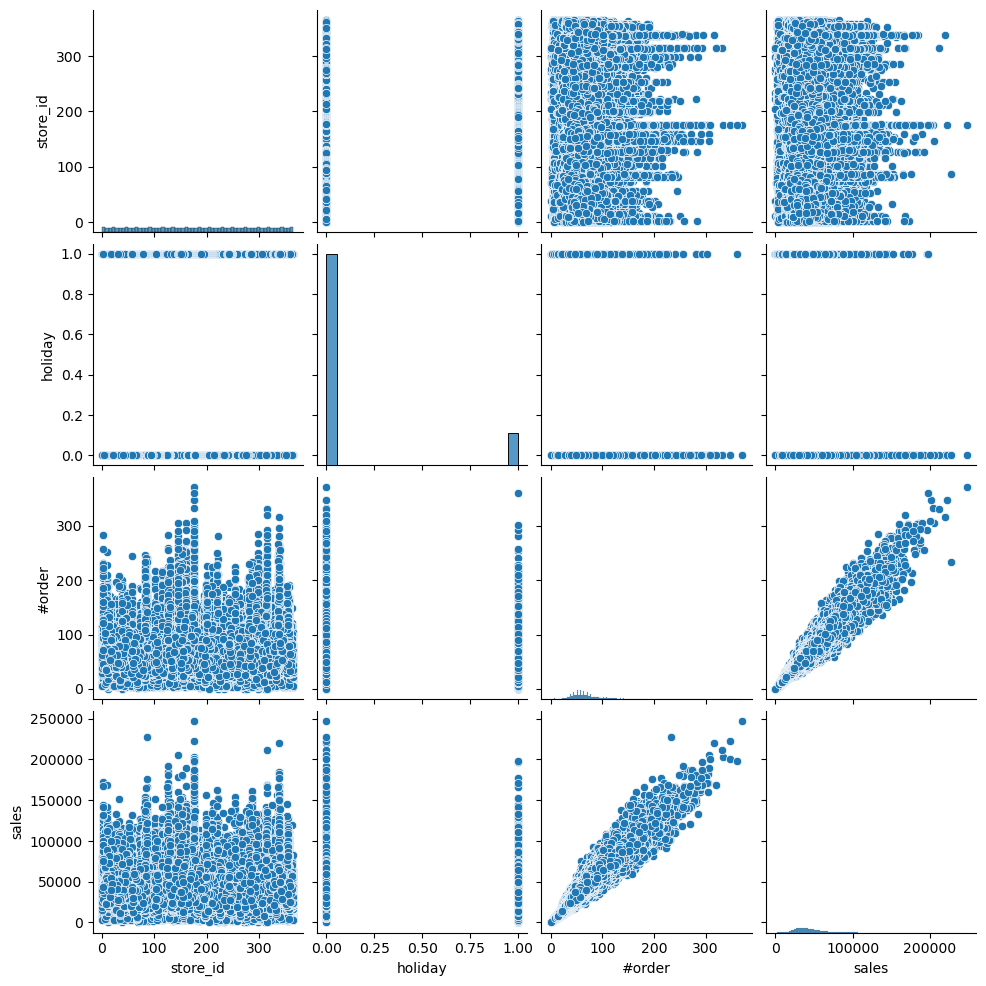

In [14]:
sns.pairplot(df);

In [79]:
df.describe()

,store_id,holiday,#order,sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


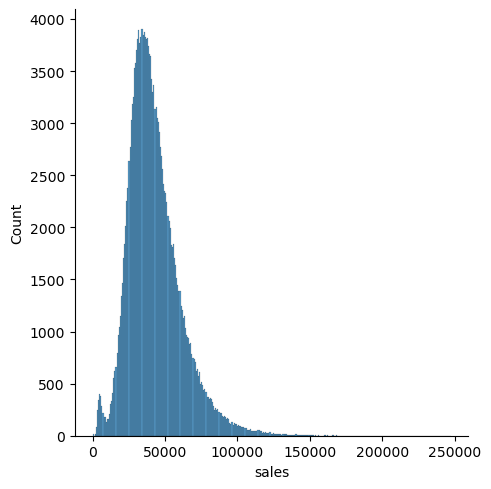

In [93]:
sns.displot(df['sales']);

It is left-skewed!

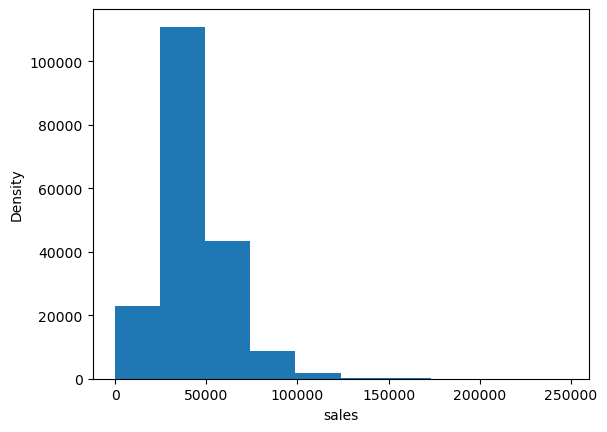

In [27]:
plt.hist(df['sales'])
plt.xlabel('sales')
plt.ylabel('Density');

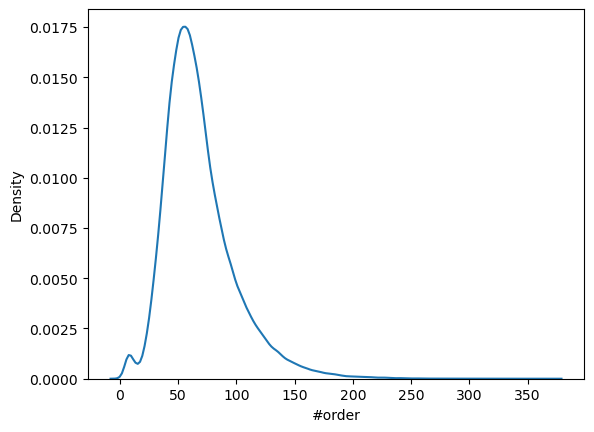

In [82]:
sns.kdeplot(df['#order']);

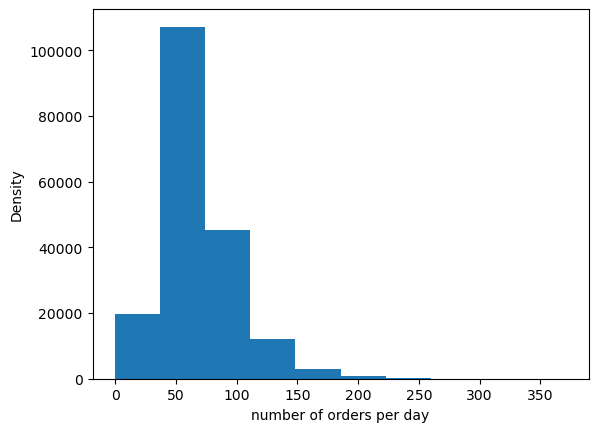

In [28]:
plt.hist(df['#order'])
plt.xlabel('number of orders per day')
plt.ylabel('Density');

### How do store type, location type and region effect sales?

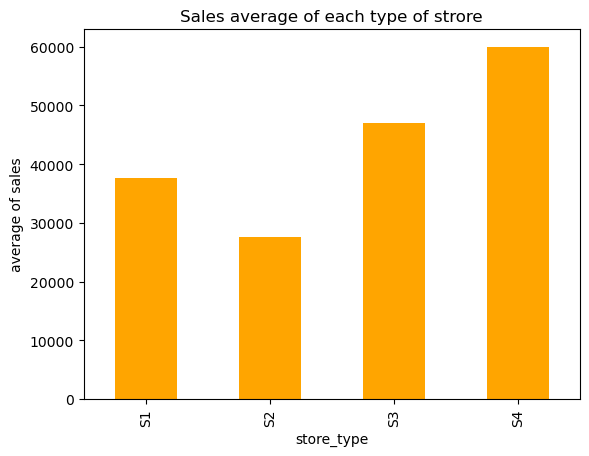

In [52]:
df.groupby('store_type')['sales'].mean().plot(kind='bar', 
                                              ylabel='average of sales', 
                                              title='Sales average of each type of strore', 
                                              color='orange');

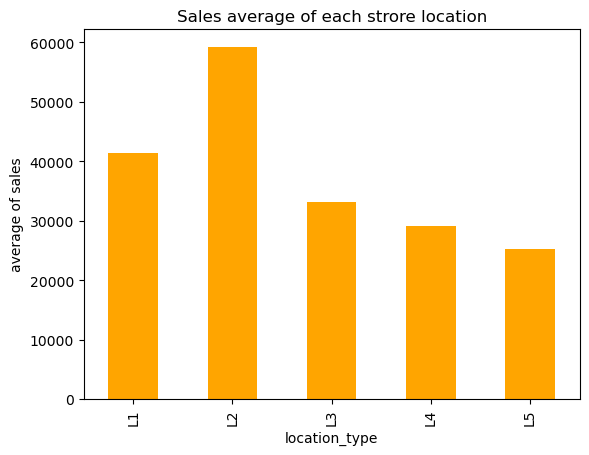

In [54]:
df.groupby('location_type')['sales'].mean().plot(kind='bar', 
                                              ylabel='average of sales', 
                                              title='Sales average of each strore location', 
                                              color='orange');

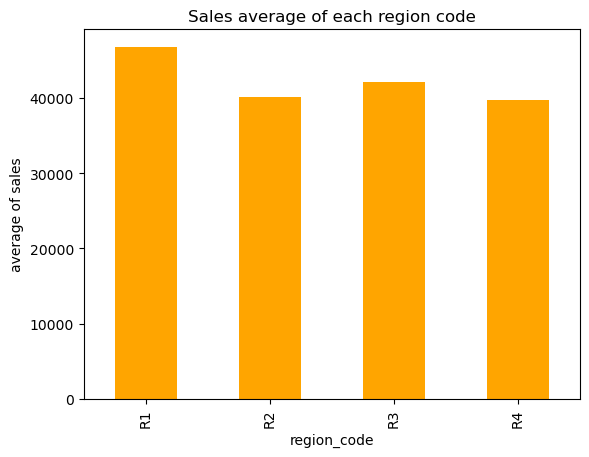

In [55]:
df.groupby('region_code')['sales'].mean().plot(kind='bar', 
                                              ylabel='average of sales', 
                                              title='Sales average of each region code', 
                                              color='orange');

### How do discounts effect # of orders, sales?

In [97]:
df.groupby('discount')['#order'].mean()

discount
0    61.806153
1    76.105637
Name: #order, dtype: float64

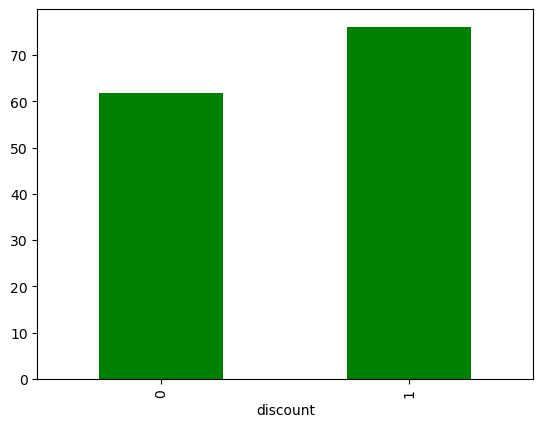

In [104]:
df.groupby('discount')['#order'].mean().plot(kind='bar', color='green');

In [101]:
df.groupby('discount')['sales'].mean()

discount
0    37403.679678
1    49426.497620
Name: sales, dtype: float64

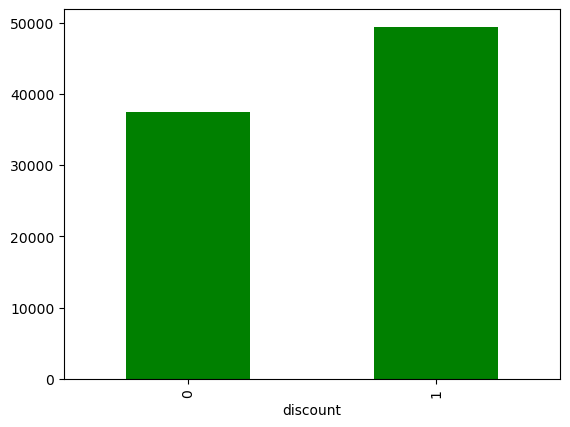

In [103]:
df.groupby('discount')['sales'].mean().plot(kind='bar', color='green');

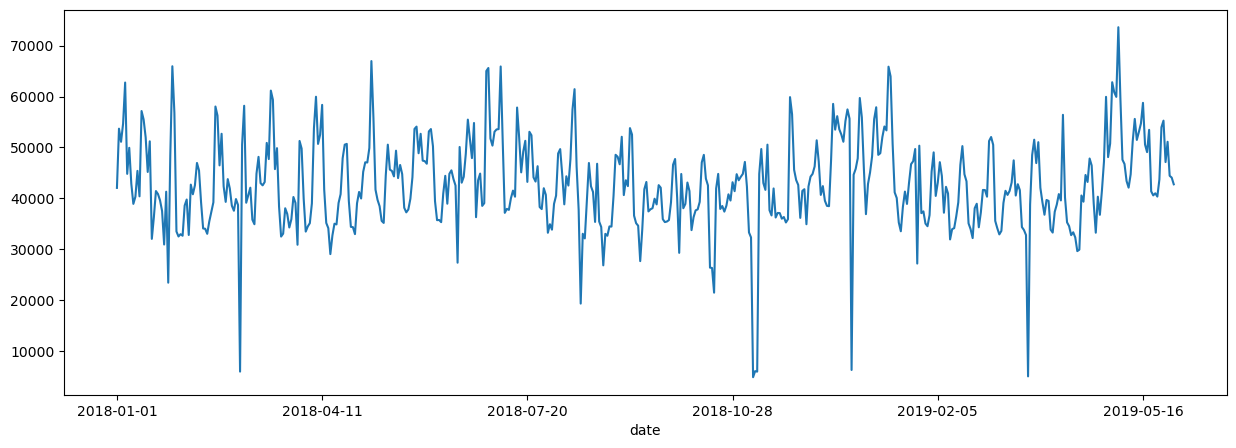

In [65]:
df.groupby('date')['sales'].mean().plot(figsize=(15, 5));

C:\Users\kavia\AppData\Local\Temp\ipykernel_50340\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

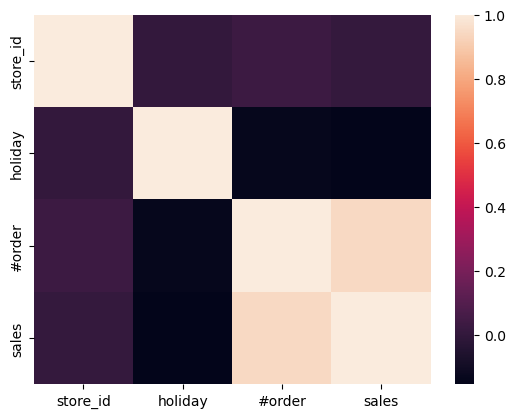

In [71]:
sns.heatmap(df.corr())

In [72]:
df.head()

,id,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [75]:
df_dummy = pd.get_dummies(df, columns=['store_type', 'location_type', 'region_code', 'holiday', 'discount'], drop_first=True)

In [88]:
df_dummy.head()

,id,store_id,date,#order,sales,store_type_S2,store_type_S3,store_type_S4,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R2,region_code_R3,region_code_R4,holiday_1,discount_Yes
0,T1000001,1,2018-01-01,9,7011.84,0,0,0,0,1,0,0,0,0,0,1,1
1,T1000002,253,2018-01-01,60,51789.12,0,0,1,1,0,0,0,0,0,0,1,1
2,T1000003,252,2018-01-01,42,36868.20,0,1,0,1,0,0,0,0,0,0,1,1
3,T1000004,251,2018-01-01,23,19715.16,1,0,0,0,1,0,0,0,0,0,1,1
4,T1000005,250,2018-01-01,62,45614.52,1,0,0,0,1,0,0,0,0,1,1,1


### Dealing with outliers

C:\Users\kavia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


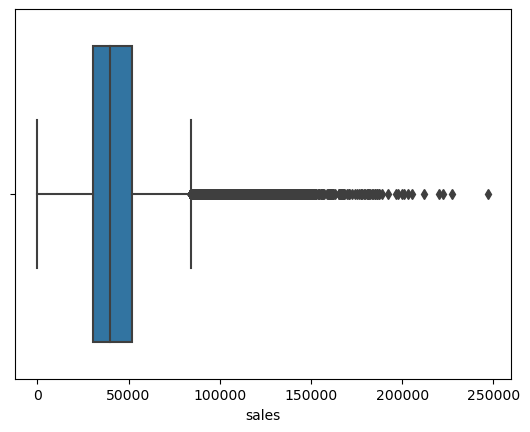

In [83]:
out = sns.boxplot(df["sales"])

In [85]:
q1 = df["sales"].quantile(0.25)
q3 = df["sales"].quantile(0.75)
iqr = q3 - q1

df_out = df[(df["sales"] >= q1 - 1.5 * iqr) & (df["sales"] <= q3 + 1.5 * iqr)]

In [86]:
df_out

,id,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


C:\Users\kavia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


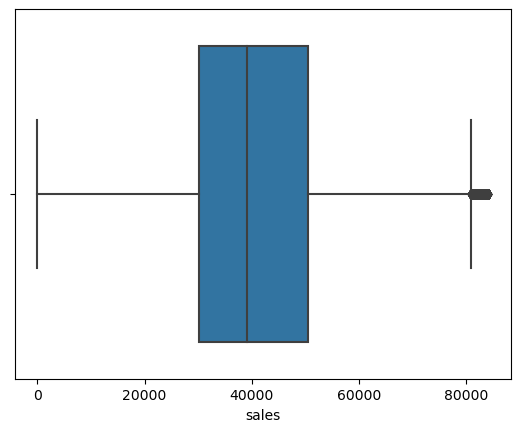

In [89]:
out = sns.boxplot(df_out["sales"])